In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
titanic = pd.read_csv('/content/drive/MyDrive/test/titanic.csv')

In [5]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [19]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

생존자 확인

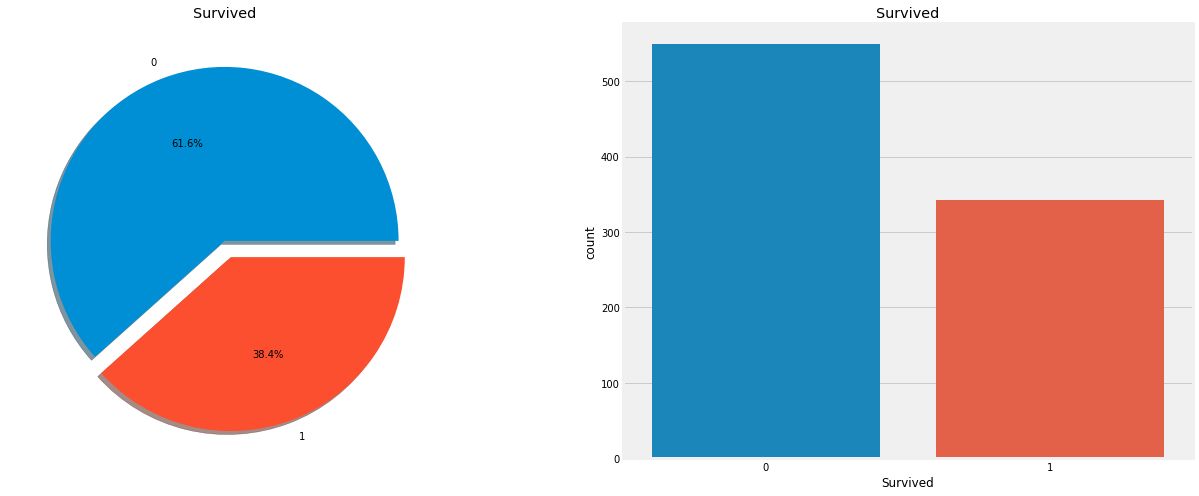

In [23]:
f,ax = plt.subplots(1,2,figsize=(20,8))
titanic['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
#print(ax[1])
sns.countplot('Survived',data=titanic,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

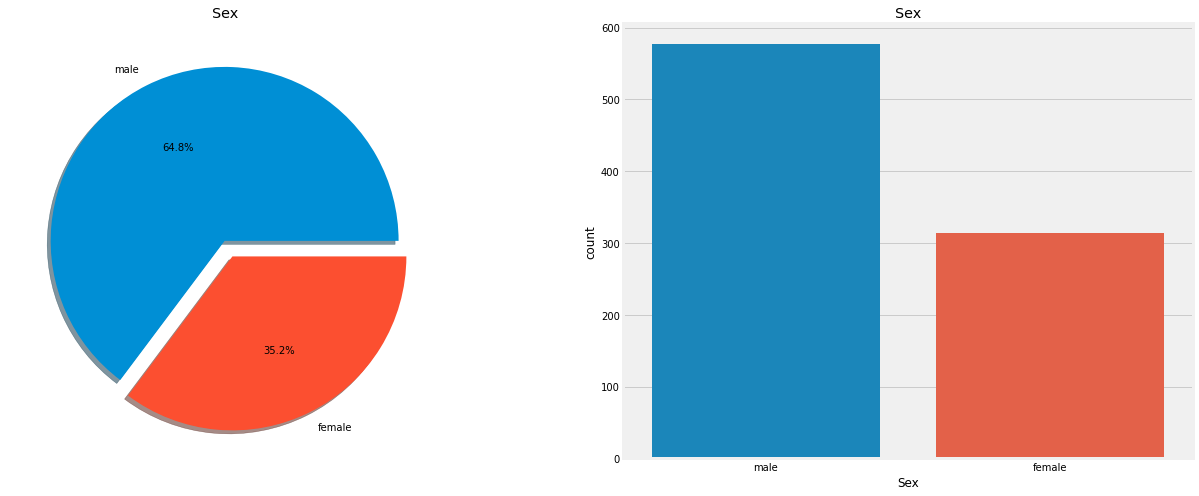

In [34]:
f,ax = plt.subplots(1,2,figsize=(20,8))
titanic['Sex'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Sex')
ax[0].set_ylabel('')
#print(ax[1])
sns.countplot('Sex',data=titanic,ax=ax[1])
ax[1].set_title('Sex')
plt.show()

성별로 생존자 확인

In [24]:
titanic.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<function matplotlib.pyplot.show>

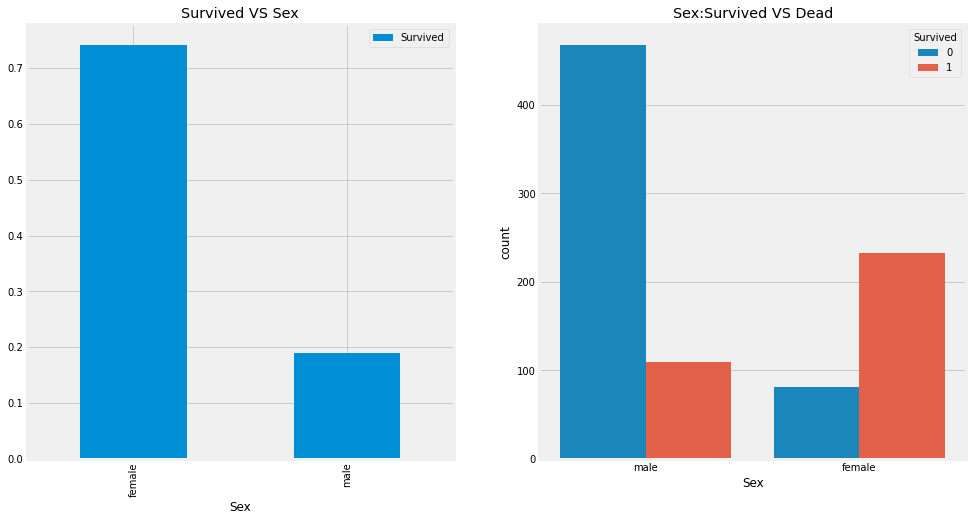

In [68]:
f,ax = plt.subplots(1,2,figsize=(15,8))
titanic[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived VS Sex')
sns.countplot('Sex',hue='Survived',data=titanic,ax=ax[1])
ax[1].set_title('Sex:Survived VS Dead')
plt.show

객실 별 생존자

<function matplotlib.pyplot.show>

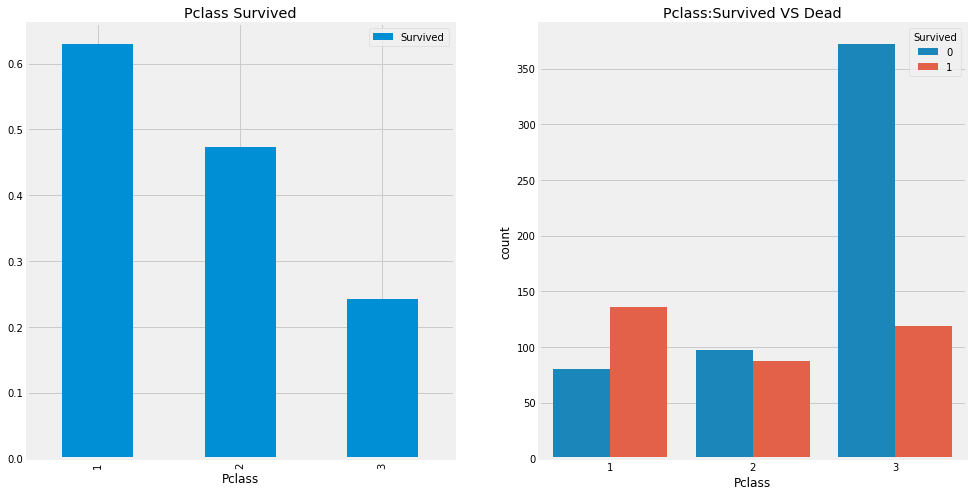

In [70]:
f,ax = plt.subplots(1,2,figsize=(15,8))
titanic[['Sex','Survived','Pclass']].groupby(['Pclass']).mean([]).plot.bar(ax=ax[0])
ax[0].set_title('Pclass Survived')
sns.countplot('Pclass',hue='Survived',data=titanic,ax=ax[1])
ax[1].set_title('Pclass:Survived VS Dead')
plt.show

객실 등급별 생존자

In [30]:
pd.crosstab(titanic.Pclass,titanic.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


Text(0.5, 1.0, 'Pclass:Survived vs Dead')

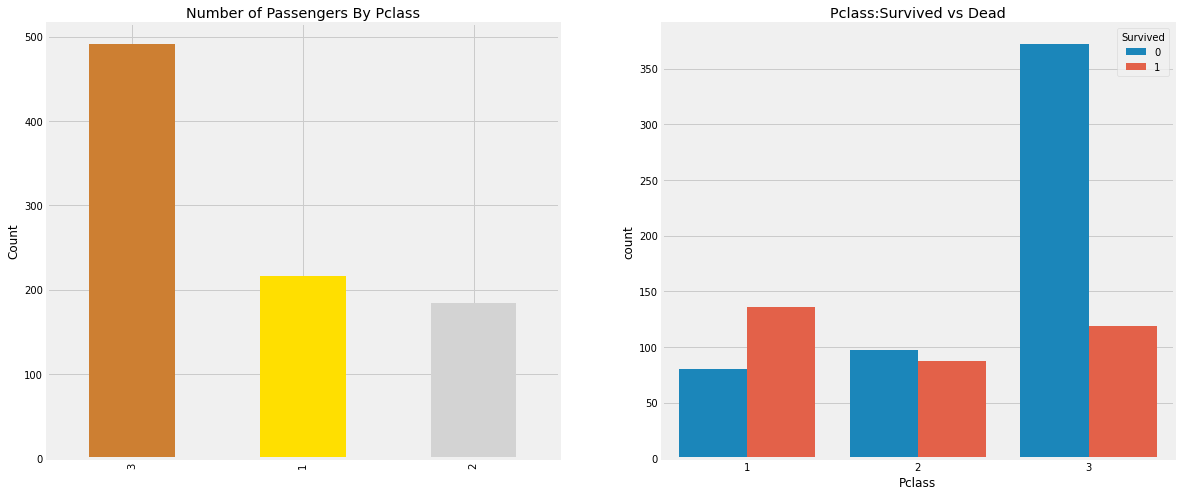

In [32]:
f,ax = plt.subplots(1,2,figsize=(18,8))
titanic['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass',hue='Survived',data=titanic,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')

성별에다른 객실별 생존율


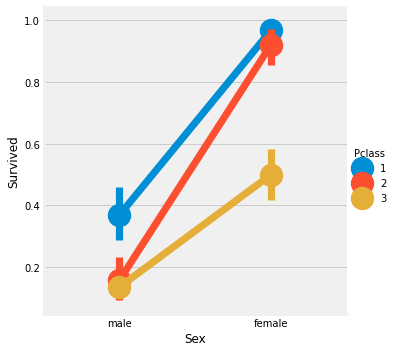

In [79]:
sns.factorplot('Sex', 'Survived', hue = 'Pclass', data= titanic)
plt.show()